# 0 Load data


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from function import *
from function.global_varibles import *
import glob


%load_ext autoreload
%autoreload 2


df_pv_npv = pd.read_csv(PATHS['df_pv_npv'])
df_agricultural_npv = pd.read_csv(PATHS['df_agricultural_npv'])
df_afforestation_npv = pd.read_csv(PATHS['df_afforestation_npv'])
df_natural_npv = pd.read_csv(PATHS['df_natural_npv'])

# 加载策略数据
df_weight = pd.read_csv(PATHS['data_weighted_density'])
df_strategies=pd.read_csv(PATHS['data_strategies'])
df_net_benefit=pd.read_csv(PATHS['data_prediction_carbon_benefit'])

# 加载经济预期数据
df_economic=pd.read_csv(PATHS['df_economic_feasibility'])





gogogo


In [36]:
# Select pixel with specified coordinates for year 2050
pixel_data = df_economic[(df_economic['analysis_year']==2050) & 
                        (df_economic['lat']==25.004168) & 
                        (df_economic['lon']==-107.545830)]
pixel_data

,lat,lon,pv_category,pv_model,pv_scenario,policy_category,rcp_category,net_npv_usd,net_cost_usd,analysis_year
55898040,25.004168,-107.54583,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-1.267334e+06,6.019833e+06,2050
55898340,25.004168,-107.54583,C3,REMIND 2.1,CEMICS_GDPgrowth_2C,P2a,RCP2.6,-2.246539e+06,6.049129e+06,2050
55898640,25.004168,-107.54583,C1,REMIND 2.1,CEMICS_HotellingConst_1p5,P2a,RCP2.6,-1.451630e+06,6.011279e+06,2050
55898940,25.004168,-107.54583,C3,REMIND 2.1,CEMICS_HotellingConst_2C,P2a,RCP2.6,-2.534457e+06,6.046688e+06,2050
55899240,25.004168,-107.54583,C1,REMIND 2.1,CEMICS_Linear_1p5,P2a,RCP2.6,-1.227148e+06,6.024415e+06,2050
...,...,...,...,...,...,...,...,...,...,...
70398512,25.004168,-107.54583,C7,TIAM-ECN 1.1,EN_INDCi2100_NDCp,P1c,RCP8.5,1.245723e+07,4.654170e+06,2050
70398812,25.004168,-107.54583,C6,TIAM-ECN 1.1,EN_NPi2020_3000,P2a,RCP8.5,8.789591e+06,4.654170e+06,2050
70399112,25.004168,-107.54583,C6,TIAM-ECN 1.1,EN_NPi2020_3000f,P2a,RCP8.5,8.789600e+06,4.654170e+06,2050
70399412,25.004168,-107.54583,C7,TIAM-ECN 1.1,EN_NPi2100,P1b,RCP8.5,8.322597e+06,4.654170e+06,2050


# ## 1. 撂荒地用于光伏建设再开发的决策优先级分区

**预期**：通过环境潜力、减排潜力、经济潜力（三类可行性）提供全面的决策信息。

**体现光伏带来的效益**：让不同区域或国家决策者能够更清晰知道自身在主要维度上哪一块是短板，能够大概了解：在本地再开发xx%比例的撂荒地用于光伏建设，是边际效益变化最为"剧烈"的区域
- 单维度（三个图）：x轴是分位数变化（这里的测度可以是由跟着主图的三变量相关性）；y轴累积效应（如果区域效益差距过大、可以考虑用百分比表示）；图中加上斜率，折线代表各个区域（决策主体）
- 多维度（一个图）：三个维度的轴汇总在一起，观测联合边际效应变化区域

**体现光伏收益的时效**：让决策者知道撂荒地开发在2020-2050期间大概要花多久才能起到较好的政策效果
- 在2020-2050年30年期间，随着时间变化，各个决策主体在开发10%、20%..一直到100%等不同优先区的情况下，随着时间变化各维度效益发展路径。（可以在图中以凸包、区间的形式表达）


第一个图：空间决策协同度优先级图
请你帮我构造一个消除三变量量纲影响的函数，能够描述三个变量的协同度，并且在图上对齐进行分级显示
以下是三类潜力的变量申明：

首先是经济维度，根据df_economic数据中的每个pixel的analysis_year==2050时候的['net_npv_usd']值，为每个pixel生成df['avg_npv']（均值，每个pixel大概有265个值）

其次是环境维度，根据df_weight数据中的每个pixel的['env_scores']值

再次是减排维度，根据df_weight数据中的每个pixel的['Expectation_net_benefit']值



df_economic[Policy_category]: 'P2a', 'P1b', 'P1a', 'P4', 'P2c', 'P1c', 'P2', 'P1d', 'P3b', 'P3c', 'P3a'

经济潜力需要的变量：df_economic[net_npv_usd] （每个pixel可能有265个值，需要根据根据Policy_category group并计算各个policy以及总体的mean均值）
环境潜力需要的变量: df_weight[env_scores]
减排潜力所需的变量：df_weight[Expectation_net_benefit]

每个中都有analysis_year标注年份2020,2030,2040,2050



## Function加载模块

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize
from tqdm.auto import tqdm
import time

class SynergyCalculator:
    """
    协同度计算器 - 带进度条和权重迭代过程
    """
    
    def __init__(self, method='hybrid', weights=None, show_progress=True):
        """
        初始化协同度计算器
        
        Parameters:
        -----------
        method : str
            计算方法: 'hybrid', 'optimization'
        weights : array-like
            各维度权重
        show_progress : bool
            是否显示进度条
        """
        self.method = method
        self.weights = weights if weights is not None else np.array([0.4, 0.3, 0.3])
        self.show_progress = show_progress
        self.optimization_history = []  # 记录优化过程
        
    def calculate_cv_synergy(self, data_matrix):
        """变异系数法"""
        if self.show_progress:
            print("计算变异系数协同度...")
        
        std_values = np.std(data_matrix, axis=1)
        mean_values = np.mean(data_matrix, axis=1)
        cv = std_values / (mean_values + 1e-8)
        return 1 / (1 + cv)
    
    def calculate_ccd_synergy(self, data_matrix):
        """耦合协调度法"""
        if self.show_progress:
            print("计算耦合协调度...")
        
        n_variables = data_matrix.shape[1]
        
        # 耦合度
        product_values = np.prod(data_matrix, axis=1)
        mean_values = np.mean(data_matrix, axis=1)
        coupling_degree = np.power(product_values / np.power(mean_values, n_variables), 1/n_variables)
        
        # 协调度
        coordination_degree = np.sum(data_matrix * self.weights, axis=1)
        
        # 耦合协调度
        coupling_coordination_degree = np.sqrt(coupling_degree * coordination_degree)
        
        return coupling_coordination_degree, coupling_degree, coordination_degree
    
    def calculate_hybrid_synergy(self, data_matrix):
        """混合方法：耦合协调度 + 变异系数"""
        if self.show_progress:
            print("计算混合协同度...")
        
        cv_synergy = self.calculate_cv_synergy(data_matrix)
        ccd_synergy, _, _ = self.calculate_ccd_synergy(data_matrix)
        
        # 动态权重
        development_level = np.mean(data_matrix, axis=1)
        cv_weight = 1 - development_level
        ccd_weight = development_level
        
        # 归一化
        total_weight = cv_weight + ccd_weight
        cv_weight = cv_weight / total_weight
        ccd_weight = ccd_weight / total_weight
        
        hybrid_synergy = cv_synergy * cv_weight + ccd_synergy * ccd_weight
        return hybrid_synergy
    
    def calculate_optimization_synergy(self, data_matrix):
        """优化方法 - 带进度条和迭代过程记录"""
        n_samples, n_features = data_matrix.shape
        
        if self.show_progress:
            print("开始优化权重计算...")
            print(f"数据维度: {n_samples} 样本, {n_features} 特征")

        # 目标函数：最大化加权和的平均值
        def objective(weights):
            weighted_sum = np.dot(data_matrix, weights)
            mean_score = np.mean(weighted_sum)
            penalty = 100 * (np.sum(weights) - 1)**2
            return -mean_score + penalty

        # 回调函数：记录优化过程
        def callback(weights):
            self.optimization_history.append(weights.copy())

        # 初始权重
        initial_weights = np.ones(n_features) / n_features
        self.optimization_history = [initial_weights.copy()]

        # 约束：权重和为1
        constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
        bounds = [(0, 1) for _ in range(n_features)]

        if self.show_progress:
            print("执行优化算法...")
            start_time = time.time()

        # 执行优化
        result = minimize(objective, initial_weights, method='SLSQP',
                          bounds=bounds, constraints=constraints,
                          callback=callback, options={'maxiter': 1000})

        if self.show_progress:
            end_time = time.time()
            print(f"优化完成，耗时: {end_time - start_time:.2f} 秒")
            print(f"优化状态: {'成功' if result.success else '失败'}")
            print(f"迭代次数: {len(self.optimization_history)}")

        if result.success:
            optimal_weights = result.x
            synergy_score = np.dot(data_matrix, optimal_weights)
            
            if self.show_progress:
                print(f"最优权重: {optimal_weights}")
                print(f"目标函数值: {-result.fun:.6f}")
        else:
            print("优化失败，返回默认平均权重")
            optimal_weights = initial_weights
            synergy_score = np.dot(data_matrix, optimal_weights)

        return synergy_score, optimal_weights
    
    def calculate_synergy(self, data_matrix):
        """主计算函数"""
        if self.method == 'hybrid':
            return self.calculate_hybrid_synergy(data_matrix)
        elif self.method == 'optimization':
            return self.calculate_optimization_synergy(data_matrix)
        else:
            raise ValueError(f"不支持的方法: {self.method}")

## 绘图基础数据模块

正在使用 hybrid 方法计算协同度...
处理经济数据...
处理环境和减排数据...
合并数据...
过滤数据...
有效数据点数量: 70,312
标准化数据...
计算混合协同度...
计算变异系数协同度...
计算耦合协调度...
分级显示...
绘制地图...


绘制等级:   0%|          | 0/5 [00:00<?, ?it/s]

HYBRID 方法计算完成！
正在使用 optimization 方法计算协同度...
处理经济数据...
处理环境和减排数据...
合并数据...
过滤数据...
有效数据点数量: 70,312
标准化数据...
开始优化权重计算...
数据维度: 70312 样本, 3 特征
执行优化算法...
优化完成，耗时: 0.02 秒
优化状态: 成功
迭代次数: 8
最优权重: [9.11404190e-16 1.00000000e+00 5.55111512e-17]
目标函数值: 0.588101
分级显示...
绘制地图...


绘制等级:   0%|          | 0/5 [00:00<?, ?it/s]

OPTIMIZATION 方法计算完成！


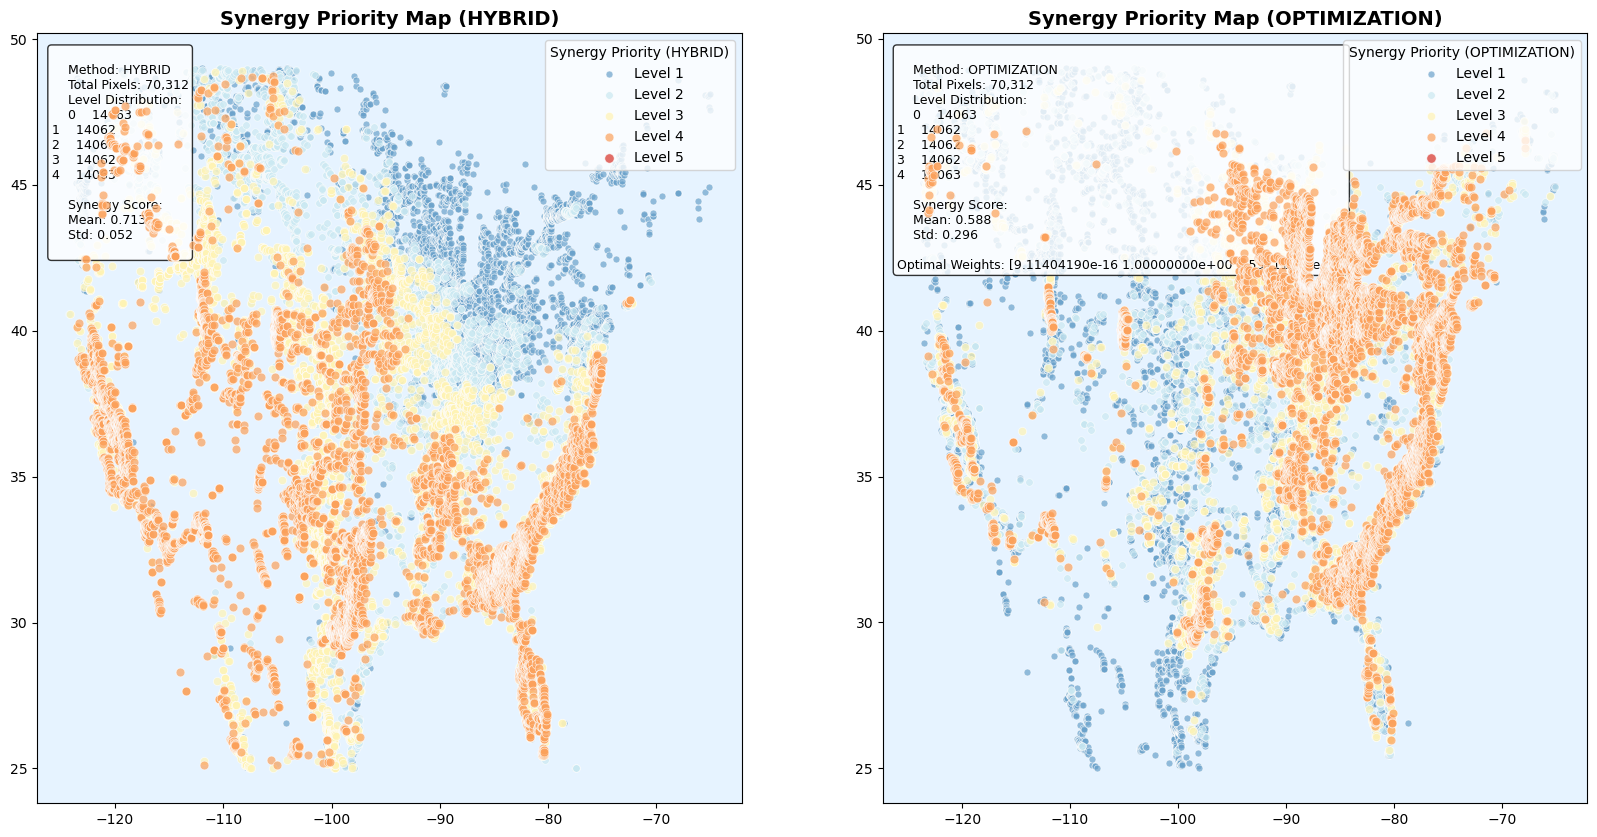

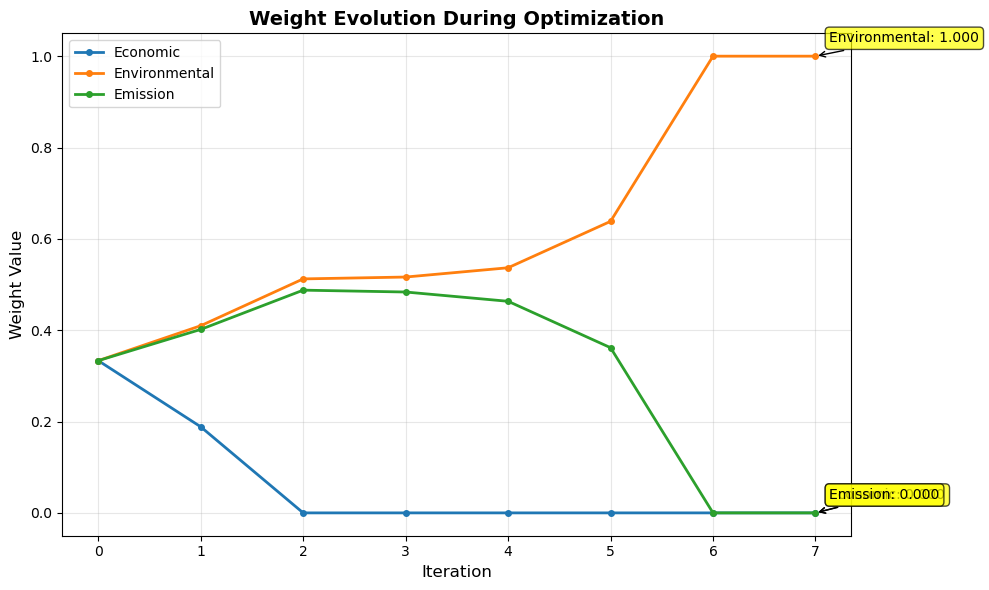

<Figure size 640x480 with 0 Axes>

In [51]:

def create_synergy_map(df_economic, df_weight, ax, 
                      method='hybrid', weights=None,
                      bounds=(-125, -65, 24, 51),
                      n_levels=5, save_path=None, show_progress=True):
    """
    协同度空间决策优先级图 - 带进度条
    """
    
    # 1. 数据预处理
    if show_progress:
        print(f"正在使用 {method} 方法计算协同度...")
        print("=" * 50)
    
    # 经济维度
    if show_progress:
        print("处理经济数据...")
    economic_2050 = df_economic[df_economic['analysis_year'] == 2050]
    avg_npv = economic_2050.groupby(['lon', 'lat'])['net_npv_usd'].mean().reset_index()
    avg_npv.columns = ['lon', 'lat', 'avg_npv']
    
    # 环境和减排维度
    if show_progress:
        print("处理环境和减排数据...")
    env_data = df_weight[['lon', 'lat', 'env_scores']].copy()
    emission_data = df_weight[['lon', 'lat', 'Expectation_net_benefit']].copy()
    
    # 2. 合并数据
    if show_progress:
        print("合并数据...")
    merged_data = avg_npv.merge(env_data, on=['lon', 'lat'], how='inner')
    merged_data = merged_data.merge(emission_data, on=['lon', 'lat'], how='inner')
    
    # 3. 数据过滤
    if show_progress:
        print("过滤数据...")
    xmin, xmax, ymin, ymax = bounds
    filtered_data = merged_data[
        (merged_data['lon'] >= xmin) & (merged_data['lon'] <= xmax) &
        (merged_data['lat'] >= ymin) & (merged_data['lat'] <= ymax)
    ].copy()
    
    if len(filtered_data) == 0:
        print("警告：过滤后没有数据")
        return None
    
    if show_progress:
        print(f"有效数据点数量: {len(filtered_data):,}")
    
    # 4. 标准化
    if show_progress:
        print("标准化数据...")
    scaler = MinMaxScaler()
    variables = ['avg_npv', 'env_scores', 'Expectation_net_benefit']
    scaled_data = scaler.fit_transform(filtered_data[variables])
    
    # 5. 计算协同度
    calculator = SynergyCalculator(method=method, weights=weights, show_progress=show_progress)
    result = calculator.calculate_synergy(scaled_data)
    
    if method == 'optimization':
        synergy_score, optimal_weights = result
        additional_info = {
            'optimal_weights': optimal_weights,
            'optimization_history': calculator.optimization_history
        }
    else:
        synergy_score = result
        additional_info = {}
    
    # 6. 分级显示
    if show_progress:
        print("分级显示...")
    quantiles = np.linspace(0, 1, n_levels + 1)
    level_bounds = np.quantile(synergy_score, quantiles)
    levels = np.digitize(synergy_score, level_bounds[1:-1])
    
    # 7. 绘制地图
    if show_progress:
        print("绘制地图...")
    colors = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', 
              '#ffffcc', '#fee090', '#fdae61', '#f46d43', '#d73027']
    
    custom_cmap = LinearSegmentedColormap.from_list("synergy_colors", 
                                                   list(zip(np.linspace(0, 1, len(colors)), colors)), 
                                                   N=256)
    
    for level in tqdm(range(1, n_levels + 1), desc="绘制等级", disable=not show_progress):
        mask = levels == level
        if mask.sum() > 0:
            level_data = filtered_data[mask]
            color = custom_cmap(level / n_levels)
            size = 20 + (level * 5)
            
            ax.scatter(level_data['lon'], level_data['lat'], 
                      c=[color], s=size, alpha=0.7, 
                      edgecolors='white', linewidth=0.5, zorder=level)
    
    # 8. 添加图例和统计信息
    legend_elements = []
    for level in range(1, n_levels + 1):
        color = custom_cmap(level / n_levels)
        size = 20 + (level * 5)
        legend_elements.append(plt.scatter([], [], c=[color], s=size, 
                                         alpha=0.7, edgecolors='white', linewidth=0.5,
                                         label=f'Level {level}'))
    
    ax.legend(handles=legend_elements, loc='upper right', 
             title=f'Synergy Priority ({method.upper()})', fontsize=10)
    
    # 统计信息
    stats_text = f"""
    Method: {method.upper()}
    Total Pixels: {len(filtered_data):,}
    Level Distribution:
    {pd.Series(levels).value_counts().sort_index().to_string()}
    
    Synergy Score:
    Mean: {synergy_score.mean():.3f}
    Std: {synergy_score.std():.3f}
    """
    
    if additional_info and 'optimal_weights' in additional_info:
        stats_text += f"\nOptimal Weights: {additional_info['optimal_weights']}"
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    if show_progress:
        print(f"{method.upper()} 方法计算完成！")
        print("=" * 50)
    
    return filtered_data, synergy_score, levels, additional_info

def plot_optimization_process(optimization_history, variable_names=None):
    """
    绘制优化过程的权重变化
    """
    if variable_names is None:
        variable_names = ['Economic', 'Environmental', 'Emission']
    
    optimization_history = np.array(optimization_history)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, name in enumerate(variable_names):
        ax.plot(optimization_history[:, i], label=name, linewidth=2, marker='o', markersize=4)
    
    ax.set_xlabel('Iteration', fontsize=12)
    ax.set_ylabel('Weight Value', fontsize=12)
    ax.set_title('Weight Evolution During Optimization', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 添加最终权重标注
    final_weights = optimization_history[-1]
    for i, (weight, name) in enumerate(zip(final_weights, variable_names)):
        ax.annotate(f'{name}: {weight:.3f}', 
                   xy=(len(optimization_history)-1, weight),
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.tight_layout()
    plt.show()

# 使用示例
def plot_synergy_comparison(df_economic, df_weight, 
                           bounds=(-125, -65, 24, 51), n_levels=5, show_progress=True):
    """
    绘制混合方法和优化方法的对比图 - 带进度条
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    results = {}
    
    # 混合方法
    ax1.set_facecolor('#e6f3ff')
    result1 = create_synergy_map(df_economic, df_weight, ax1, 
                                method='hybrid', bounds=bounds, n_levels=n_levels, 
                                show_progress=show_progress)
    
    if result1 is not None:
        filtered_data1, synergy_score1, levels1, additional_info1 = result1
        results['hybrid'] = {
            'synergy_score': synergy_score1,
            'levels': levels1,
            'additional_info': additional_info1
        }
        ax1.set_title('Synergy Priority Map (HYBRID)', fontsize=14, fontweight='bold')
    
    # 优化方法
    ax2.set_facecolor('#e6f3ff')
    result2 = create_synergy_map(df_economic, df_weight, ax2, 
                                method='optimization', bounds=bounds, n_levels=n_levels,
                                show_progress=show_progress)
    
    if result2 is not None:
        filtered_data2, synergy_score2, levels2, additional_info2 = result2
        results['optimization'] = {
            'synergy_score': synergy_score2,
            'levels': levels2,
            'additional_info': additional_info2
        }
        ax2.set_title('Synergy Priority Map (OPTIMIZATION)', fontsize=14, fontweight='bold')
        
        # 绘制优化过程
        if 'optimization_history' in additional_info2:
            plot_optimization_process(additional_info2['optimization_history'])
    
    plt.tight_layout()
    plt.show()
    
    return results

# 调用示例
results = plot_synergy_comparison(df_economic, df_weight, show_progress=True)

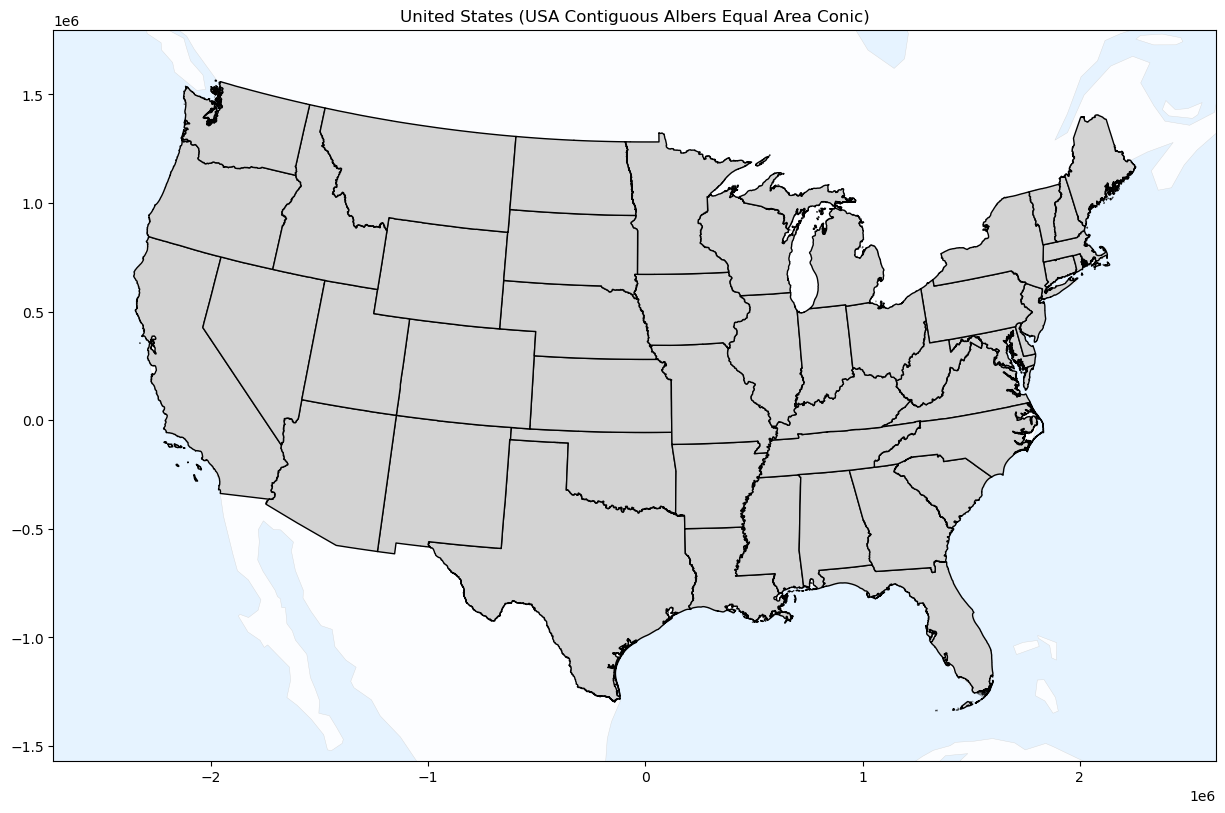

In [45]:
import geopandas as gpd
from shapely.geometry import Polygon, Point, box
import matplotlib.pyplot as plt

# Read US states shapefile
us_states = gpd.read_file('data/cb_2018_us_state_500k.shp')

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,
    'lon_max': -65,
    'lat_min': 24,
    'lat_max': 51 
}

# Create bounding box
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

# 裁剪并投影美国边界
us_bound = us_states.to_crs(epsg=4326).clip(bbox)
us_bound_albers = us_bound.to_crs('ESRI:102003')

# 设置图形
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor('#e6f3ff')

# 方案：裁剪世界大陆底图到美国周边区域
helper_shapefile = r'figure\draw_shp\ne_110m_land.shp'
try:
    helper_gdf = gpd.read_file(helper_shapefile)
    
    # 创建更聚焦的边界框（减少扩展范围）
    extended_bbox = box(
        usa_bounds_main['lon_min'] - 5,   # 向西扩展5度
        usa_bounds_main['lat_min'] - 3,   # 向南扩展3度
        usa_bounds_main['lon_max'] + 5,   # 向东扩展5度
        usa_bounds_main['lat_max'] + 3    # 向北扩展3度
    )
    
    # 裁剪世界大陆底图到扩展区域
    helper_gdf_clipped = helper_gdf.to_crs(epsg=4326).clip(extended_bbox)
    # 投影到 Albers 坐标系
    helper_gdf_proj = helper_gdf_clipped.to_crs('ESRI:102003')
    
    # 绘制底图
    helper_gdf_proj.plot(ax=ax, color='white', 
                        edgecolor='lightgray', linewidth=0.3, alpha=0.9)
    
except Exception as e:
    print(f"Helper map error: {e}")

# 绘制美国边界
us_bound_albers.plot(ax=ax, color='lightgray', edgecolor='black')

# 获取投影后的美国边界范围
xmin, ymin, xmax, ymax = us_bound_albers.total_bounds

# 按照标准地图制图规范设置边距
# 计算地图范围
map_width = xmax - xmin
map_height = ymax - ymin

# 标准边距设置（地图范围的百分比）
margin_percentage = 0.08  # 8% 的边距，符合标准地图制图规范

margin_x = map_width * margin_percentage
margin_y = map_height * margin_percentage

# 设置地图边界范围
ax.set_xlim(xmin - margin_x, xmax + margin_x)
ax.set_ylim(ymin - margin_y, ymax + margin_y)

# 设置合适的宽高比（黄金比例）
ax.set_aspect('equal')

plt.title('United States (USA Contiguous Albers Equal Area Conic)')
plt.show()

# 情景检查与匹配

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from function import *
import glob




df_r10 = pd.read_csv(r'D:\xarray\aligned2\economic_cost\national_growth_rate\AR6_Scenarios_Database_R10_regions_v1.1.csv')
df_world = pd.read_csv(r'D:\xarray\aligned2\economic_cost\national_growth_rate\AR6_Scenarios_Database_World_v1.1.csv')
df_indicators = pd.read_csv(r'D:\xarray\aligned2\economic_cost\national_growth_rate\AR6_Scenarios_Database_metadata_indicators_v1.1.csv')
df_data = pd.read_csv(r'data\4.data_prediction_net_benefit.csv')









gogogo


In [ ]:
# Create scenario identifiers and map to categories
# Get unique regions
# accross all regions 285 
unique_regions = df_r10['Region'].unique()

# Get scenarios from df_indicators
indicator_scenarios = set(df_indicators['Model'].astype(str) + '_' + df_indicators['Scenario'].astype(str))

# Find scenarios common across all regions
scenarios_by_region = {}
for region in unique_regions:
    df_region = df_r10[df_r10['Region'] == region]
    scenarios_region = set(df_region['Model'].astype(str) + '_' + df_region['Scenario'].astype(str))
    scenarios_by_region[region] = scenarios_region

# Get intersection of scenarios across all regions and indicators
common_scenarios = set.intersection(*scenarios_by_region.values(), indicator_scenarios)

# Create mapping of scenarios to categories
scenario_categories = {}
for _, row in df_indicators.iterrows():
    scenario_id = str(row['Model']) + '_' + str(row['Scenario'])
    if scenario_id in common_scenarios:
        scenario_categories[scenario_id] = row['Category']

# Define target variables to extract from r10 dataset
target_variables = {
    'capital_cost': 'Capital Cost|Electricity|Solar|PV',
    'om_fixed_cost': 'OM Cost|Fixed|Electricity|Solar|PV', 
    'electricity_price': 'Price|Secondary Energy|Electricity'
}

target_years = [2010, 2020, 2030, 2040, 2050]

# Process each region separately
region_scenarios = {}
for region in unique_regions:
    print(f"\nRegion: {region}")
    
    # Filter for current region
    df_r10_region = df_r10[df_r10['Region'] == region]
    
    # Filter for target variables and common scenarios
    mask_variables = df_r10_region['Variable'].isin(target_variables.values())
    mask_scenarios = df_r10_region['Model'].astype(str) + '_' + df_r10_region['Scenario'].astype(str)
    mask_scenarios = mask_scenarios.isin(common_scenarios)
    df_r10_filtered = df_r10_region[mask_variables & mask_scenarios]
    
    # Analyze variable and year availability for each scenario
    scenario_stats = {}
    for model_scenario in df_r10_filtered.groupby(['Model', 'Scenario']):
        model, scenario = model_scenario[0]
        scenario_id = f"{model}_{scenario}"
        scenario_data = model_scenario[1]
        
        # Skip if scenario not in categories mapping
        if scenario_id not in scenario_categories:
            continue
            
        var_availability = {}
        year_availability = {year: 0 for year in target_years}
        
        for var_name, var in target_variables.items():
            var_data = scenario_data[scenario_data['Variable'] == var]
            valid_years = 0
            
            for year in target_years:
                year_str = str(year)
                if year_str in var_data.columns and len(var_data) > 0:
                    value = var_data[year_str].iloc[0]
                    if not pd.isna(value):
                        valid_years += 1
                        year_availability[year] += 1
                        
            var_availability[var_name] = valid_years
            
        scenario_stats[scenario_id] = {
            'category': scenario_categories[scenario_id],
            'model': model,
            'scenario': scenario,
            'variables': var_availability,
            'years': year_availability,
            'total_vars': sum(1 for v in var_availability.values() if v >= 2)
        }
    
    # Print summary statistics
    print("\nVariable availability patterns:")
    pattern_counts = {}
    for scenario_id, stats in scenario_stats.items():
        pattern = tuple(v >= 2 for v in stats['variables'].values())
        if pattern not in pattern_counts:
            pattern_counts[pattern] = {'count': 0, 'categories': {}, 'years': {y:0 for y in target_years}}
        pattern_counts[pattern]['count'] += 1
        cat = stats['category']
        pattern_counts[pattern]['categories'][cat] = pattern_counts[pattern]['categories'].get(cat, 0) + 1
        # Add year counts
        for year, count in stats['years'].items():
            pattern_counts[pattern]['years'][year] += count
    
    for pattern, counts in pattern_counts.items():
        var_pattern = [var_name for var_name, has_data in zip(target_variables.keys(), pattern) if has_data]
        print(f"\nPattern: {var_pattern}")
        print(f"Total scenarios: {counts['count']}")
        print("By category:")
        for cat, cat_count in counts['categories'].items():
            print(f"  {cat}: {cat_count}")
        print("By year:")
        for year, year_count in counts['years'].items():
            print(f"  {year}: {year_count}")
            
    # Store complete scenarios (2 or more valid variables)
    complete_scenarios_region = [(stats['model'], stats['scenario']) 
                               for stats in scenario_stats.values() 
                               if stats['total_vars'] >= 2]
    region_scenarios[region] = complete_scenarios_region


Region: R10AFRICA

Variable availability patterns:

Pattern: ['capital_cost']
Total scenarios: 1
By category:
  C7: 1
By year:
  2010: 0
  2020: 1
  2030: 1
  2040: 1
  2050: 1

Pattern: ['capital_cost', 'om_fixed_cost', 'electricity_price']
Total scenarios: 208
By category:
  C1: 29
  C3: 63
  C7: 27
  C6: 14
  C8: 6
  C2: 34
  C5: 27
  C4: 8
By year:
  2010: 624
  2020: 624
  2030: 624
  2040: 624
  2050: 624

Pattern: ['capital_cost', 'electricity_price']
Total scenarios: 42
By category:
  C3: 21
  C7: 8
  C1: 4
  C5: 7
  C4: 2
By year:
  2010: 84
  2020: 84
  2030: 84
  2040: 84
  2050: 84

Pattern: ['electricity_price']
Total scenarios: 15
By category:
  C4: 4
  C5: 4
  C6: 4
  C3: 3
By year:
  2010: 15
  2020: 15
  2030: 15
  2040: 15
  2050: 15

Region: R10CHINA+

Variable availability patterns:

Pattern: ['capital_cost']
Total scenarios: 1
By category:
  C7: 1
By year:
  2010: 0
  2020: 1
  2030: 1
  2040: 1
  2050: 1

Pattern: ['capital_cost', 'om_fixed_cost', 'electricity_pr